# Pythor- Python meets R

I typically use Python for my data analysis. However, there are many packages which exist only in R. RPy2 allows interaction between R and Python. The following post is an attempt to show how we can leverage the awesomeness of R's packages in Python. Python meets R-Pythor. The following is the Github link to the project: https://github.com/nipunbatra/pythor

The installation on OSX wasn't straighforward. The first part of this post explains how I was able to install RPy2 on OSX. In the next part, I give some sample usage.

### Installing RPY2

I assume that R was installed to the default location. First, we need to edit 
```
/opt/local/Library/Frameworks/R.framework/Resources/etc/Makeconf
```

and change the following line 

```
LIBS =  -lpcre -lbz2 -lz -lm -liconv -licuuc -licui18n
``` 

TO

```
LIBS = -lpcre -lbz2 -lz -lm -liconv
```

Next, I used Conda to install rpy2 following instructions on [this Stack Overflow question](http://stackoverflow.com/questions/24987932/installing-rpy2-on-mac-osx-with-anaconda-python-3-4-and-r-3-1-installed-via-macp).

```bash
conda skeleton pypi rpy2
conda build rpy2
conda install rpy2 --use-local
```

### Sample usage

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
df = pd.DataFrame(np.random.randn(10,5))

Vendor:  Continuum Analytics, Inc.
Package: mkl
Message: trial mode expires today

    After the trial mode has expired, if you want to use mkl thereafter,
    please purchase a license at http://continuum.io
    


In [2]:
df.head()

,0,1,2,3,4
0,0.676890,-1.482087,2.043067,-1.010374,0.065335
1,-0.844250,-0.589331,0.120395,1.735386,-3.189763
2,0.234617,0.167176,0.480042,-0.640150,1.277100
3,-1.074616,1.556356,-0.915282,-0.093384,0.150305
4,0.241990,1.570237,-0.641925,-1.392641,-1.890460


In [3]:
df.describe()

,0,1,2,3,4
count,10.000000,10.000000,10.000000,10.000000,10.000000
mean,-0.378667,0.017372,0.158079,-0.135559,-0.361603
std,0.704457,0.934311,1.206692,1.379264,1.433190
min,-1.144479,-1.482087,-1.400252,-2.258022,-3.189763
25%,-0.978215,-0.472518,-0.846942,-1.024438,-1.181485
50%,-0.657061,-0.069491,0.300219,-0.366767,0.107820
75%,0.240147,0.114515,0.863655,0.753765,0.598519
max,0.676890,1.570237,2.043067,1.939031,1.277100


In [4]:
from rpy2.robjects import pandas2ri
pandas2ri.activate()

Creating an R data drame corresponding to `df`

In [5]:
rdf = pandas2ri.py2ri(df)

In [6]:
rdf

<DataFrame - Python:0x11394ed40 / R:0x101e9ace0>
[Array, Array, Array, Array, Array]
  X0: <class 'rpy2.robjects.vectors.Array'>
  <Array - Python:0x11395d7a0 / R:0x1016170a0>
[0.676890, -0.844250, 0.234617, ..., -1.022870, 0.460171, -0.778643]
  X1: <class 'rpy2.robjects.vectors.Array'>
  <Array - Python:0x11395d7e8 / R:0x101618e00>
[-1.482087, -0.589331, 0.167176, ..., -0.354238, -0.052170, -0.086813]
  X2: <class 'rpy2.robjects.vectors.Array'>
  <Array - Python:0x11395da28 / R:0x10162a600>
[2.043067, 0.120395, 0.480042, ..., -1.400252, -1.310542, 0.595479]
  X3: <class 'rpy2.robjects.vectors.Array'>
  <Array - Python:0x11395db00 / R:0x10162f6a8>
[-1.010374, 1.735386, -0.640150, ..., 0.583008, -2.258022, 1.939031]
  X4: <class 'rpy2.robjects.vectors.Array'>
  <Array - Python:0x11395dc20 / R:0x10166d8a8>
[0.065335, -3.189763, 1.277100, ..., -1.235120, 1.072535, 0.534892]

In [7]:
print(rdf)

          X0          X1         X2          X3         X4
0  0.6768904 -1.48208689  2.0430667 -1.01037417  0.0653346
1 -0.8442496 -0.58933120  0.1203951  1.73538579 -3.1897627
2  0.2346173  0.16717606  0.4800420 -0.64015011  1.2770997
3 -1.0746162  1.55635580 -0.9152816 -0.09338397  0.1503054
4  0.2419899  1.57023703 -0.6419249 -1.39264055 -1.8904596
5 -1.1444795 -0.51194484  0.9530474 -1.02912541 -1.0205774
6 -0.5354787 -0.04346992  1.6567618  0.81068402  0.6197279
7 -1.0228700 -0.35423837 -1.4002520  0.58300793 -1.2351203
8  0.4601706 -0.05216999 -1.3105421 -2.25802150  1.0725355
9 -0.7786435 -0.08681266  0.5954790  1.93903122  0.5348916



Now, let us perform some `R` operations on the dataframe

In [8]:
import rpy2.robjects as robjects

From the `rpy2` documentation, 

>The object r in rpy2.robjects represents the running embedded R process.
If familiar with R and the R console, r is a little like a communication channel from Python to R.



### Calling basic `R` functions

* Let us now compute the `head` of our R `dataframe` rdf

In [9]:
head_df = robjects.r['head']

In [10]:
print(head_df(rdf, 2))

          X0         X1        X2        X3         X4
0  0.6768904 -1.4820869 2.0430667 -1.010374  0.0653346
1 -0.8442496 -0.5893312 0.1203951  1.735386 -3.1897627



* Now, let us find the description of the dataframe

In [11]:
r_summary =  robjects.r['summary'](rdf)
print(r_summary)

       X0                X1                 X2                X3         
 Min.   :-1.1445   Min.   :-1.48209   Min.   :-1.4003   Min.   :-2.2580  
 1st Qu.:-0.9782   1st Qu.:-0.47252   1st Qu.:-0.8469   1st Qu.:-1.0244  
 Median :-0.6571   Median :-0.06949   Median : 0.3002   Median :-0.3668  
 Mean   :-0.3787   Mean   : 0.01737   Mean   : 0.1581   Mean   :-0.1356  
 3rd Qu.: 0.2401   3rd Qu.: 0.11451   3rd Qu.: 0.8637   3rd Qu.: 0.7538  
 Max.   : 0.6769   Max.   : 1.57024   Max.   : 2.0431   Max.   : 1.9390  
       X4         
 Min.   :-3.1898  
 1st Qu.:-1.1815  
 Median : 0.1078  
 Mean   :-0.3616  
 3rd Qu.: 0.5985  
 Max.   : 1.2771  



### Using R's lm package for fitting linear models


Let us take the example of linear regression on faithful geyser data set. First, let us load the `R dataset` into Pandas.

In [12]:
faithful_pandas_df = robjects.r('faithful')

In [13]:
type(faithful_pandas_df)

pandas.core.frame.DataFrame

In [14]:
faithful_pandas_df.head()

,eruptions,waiting
1,3.600,79
2,1.800,54
3,3.333,74
4,2.283,62
5,4.533,85


Now, let us create an R dataframe from this Python dataframe. It should be noted that we could have directly used the faithful geyser dataset in R. But, I chose to do this extra conversion for purpose of illustration.

In [15]:
faithful_r_df = pandas2ri.py2ri(faithful_pandas_df)

Let us take the `head` of the R dataframe and confirm that it is the same as the pandas dataframe.

In [16]:
print(robjects.r['head'](faithful_r_df, 5))

  eruptions waiting
1     3.600      79
2     1.800      54
3     3.333      74
4     2.283      62
5     4.533      85



Great, now let us fit a linear relationship bewteen `#eruptions` and `waiting` as follows:
> $$\mathrm{eruptions} = \alpha + \beta\times\mathrm{waiting} + \epsilon$$

For the purpose of this illustration, we will assume that there exists no package for linear regression in Python. So, we will be using the `lm` R `stats` package. Our aim would be to create a function in Python that does the following:

1. Take as inputs a Pandas dataframe and the relationship string (eg. a ~b+c meeans that a is linear on b and c)
2. Use rpy2 interface to convert the Pandas dataframe to R dataframe
3. Use `lm` package from R to fit the linear relationship
4. Find the coefficients of the fit
5. Be able to predict for new data

Since we have already done step 2, we'll jump to step 3

In [17]:
from rpy2.robjects.packages import importr
stats = importr('stats')

In [18]:
fit = stats.lm('eruptions ~ waiting', data=faithful_r_df)

In [19]:
print(fit.names)

 [1] "coefficients"  "residuals"     "effects"       "rank"         
 [5] "fitted.values" "assign"        "qr"            "df.residual"  
 [9] "xlevels"       "call"          "terms"         "model"        



Let us extract the residuals from the fit R object now.

In [20]:
residuals = fit.rx2('residuals')

Viewing the first five residuals

In [21]:
print(residuals[:5])

[1] -0.50059190 -0.40989320 -0.38945216 -0.53191679 -0.02135959



Getting a NumPy array from the residuals

In [22]:
residuals_numpy = pandas2ri.ri2py(residuals)

In [23]:
residuals_numpy[:5]

array([-0.5005919 , -0.4098932 , -0.38945216, -0.53191679, -0.02135959])

Let us plot a histogram of these residuals using matplotlib now. For a `good` fit, we would expect a normal distributed residual set.

In [24]:
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
%matplotlib inline

(array([  8.,   9.,  22.,  42.,  32.,  60.,  46.,  34.,  14.,   5.]),
 array([-1.29917268, -1.04992622, -0.80067976, -0.5514333 , -0.30218683,
        -0.05294037,  0.19630609,  0.44555255,  0.69479902,  0.94404548,
         1.19329194]),
 <a list of 10 Patch objects>)

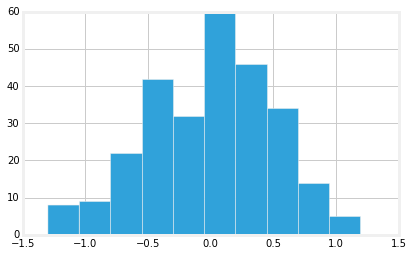

In [25]:
plt.hist(residuals_numpy)

The histogram looks reasonably good.

Now, let us extract the coeffiencts from the linear fit

In [26]:
coeffs = fit.rx2('coefficients')

In [27]:
print(coeffs)

(Intercept)     waiting 
-1.87401599  0.07562795 



In [28]:
type(coeffs)

rpy2.robjects.vectors.FloatVector

In [29]:
coeffs_python = pandas2ri.ri2py(coeffs)

In [30]:
coeffs_python

array([-1.87401599,  0.07562795])

Looks like we lost the names of columns (waiting, etc.) 

In [31]:
coeffs_python_names = pandas2ri.ri2py(coeffs.names).tolist()
coeffs_python_names

['(Intercept)', 'waiting']

Let us now extract the fitted value of `eruptions`

In [32]:
fit_eruptions = pandas2ri.ri2py(fit.rx2('fitted.values'))

Now, let us plot the true and the fitted eruptions in matplotlib.

/Users/nipunbatra/anaconda/lib/python2.7/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


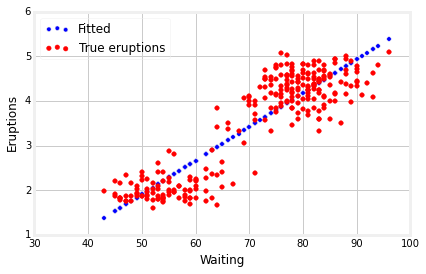

In [33]:
plt.scatter(faithful_pandas_df['waiting'], fit_eruptions, label='Fitted')
plt.scatter(faithful_pandas_df['waiting'], faithful_pandas_df['eruptions'], label='True eruptions', color='r')
plt.legend(loc='upper left')
plt.xlabel("Waiting")
plt.ylabel("Eruptions")

Now, let us predict using the learnt linear model on last five entries in the dataset.

In [34]:
last_5 = robjects.r['tail'](faithful_r_df, 5)

In [35]:
print(last_5)

    eruptions waiting
268     4.117      81
269     2.150      46
270     4.417      90
271     1.817      46
272     4.467      74



In [36]:
pred_r = stats.predict(fit, newdata=last_5)

In [37]:
print(pred_r)

     268      269      270      271      272 
4.251848 1.604870 4.932499 1.604870 3.722452 



In [38]:
pred_python = pandas2ri.ri2py(pred_r)
pred_python

array([ 4.2518478 ,  1.60486962,  4.93249933,  1.60486962,  3.72245216])

Great! Now that we are able to fit a model and also predict on it, let us now package this function similar to the scikit-learn API

In [39]:
class PYLM(object):
    from rpy2.robjects import pandas2ri
    pandas2ri.activate()
    from rpy2.robjects.packages import importr
    stats = importr('stats')
    def convert_fit_to_python(self, fit):
        coeffs_r = fit.rx2('coefficients')
        coeffs= pandas2ri.ri2py(coeffs_r)
        coeff_names =  pandas2ri.ri2py(coeffs_r.names).tolist()
        coeff_series = pd.Series({k:v for k,v in zip(coeff_names, coeffs)})
        fitted_values = pandas2ri.ri2py(fit.rx2('fitted.values'))
        return coeff_series
        
    def fit(self, relationship, df):
        """
        relationship: string of the form: a~b+c
        df: Pandas Dataframe
        """
        # Get R dataframe
        r_df = pandas2ri.py2ri(df)
        # Create linear fit
        fit = stats.lm(relationship, data=df)
        self.fit = fit
        python_fit = self.convert_fit_to_python(fit)
        return python_fit
    
    def predict(self, df):
        pred_r = stats.predict(self.fit, newdata=df)
        pred_python = pandas2ri.ri2py(pred_r)
        return pred_python
        
        

In [40]:
pylm = PYLM()
relationship='eruptions~waiting'
pylm.fit(relationship, faithful_pandas_df)

(Intercept)   -1.874016
waiting        0.075628
dtype: float64

In [41]:
pylm.predict(faithful_pandas_df.tail(5))

array([ 4.2518478 ,  1.60486962,  4.93249933,  1.60486962,  3.72245216])

Great, this means that we've now been able get the functionality of R's `lm` package! Now, let us take a more complex example

### Using R's STL package for timeseries decomposition

I'll be following [this simple to follow tutorial](http://www.r-bloggers.com/seasonal-trend-decomposition-in-r/) for the R code.

In [42]:
r_stl = robjects.r['stl']
r_ts = robjects.r['ts']

In [43]:
import datetime
data = np.arange(85.) / 12.
data = np.sin(data * (2*np.pi))
data += np.arange(85.) / 12. * .5
data += .1 * np.random.randn(85)
idx = pd.DatetimeIndex(start=datetime.datetime(1999,1,1), freq='1M', periods=len(data))
data = pd.Series(data, index=idx)

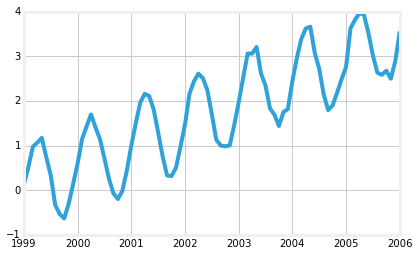

In [44]:
data.plot()

Pandas uses human understandable frequency formatting. We'll need to convert that to a suitable `periodicty` for `stl`.

* 1 year maps to 1
* Monthly frequency maps to 12
* Daily frequency maps to 365

In [45]:
def convert_pd_freqstr(df):
    """
    df: pd.DataFrame with pd.DatetimeIndex type index
    """
    freqstr = df.index.freq.freqstr
    freq_interval = freqstr[-1]
    if len(freqstr)>1:
        freq_number = int(freqstr[:-1])
    else:
        freq_number=1
    if freq_interval is 'Y':
        return 1.0/freq_number
    elif freq_interval is 'M':
        return 12.0/freq_number
    elif freq_interval is 'D':
        return 365.0/freq_number


In [46]:
convert_pd_freqstr(data)

12.0

In [47]:
r_ts_data = r_ts(robjects.FloatVector(np.asarray(data)), start= robjects.IntVector([data.index[0].year, data.index[0].month, data.index[0].day]), frequency=convert_pd_freqstr(data))

In [48]:
print(r_ts_data)

             Jan         Feb         Mar         Apr         May         Jun
1999  0.12909142  0.51848228  0.97211078  1.06376749  1.17150724  0.73897260
2000  0.59446086  1.14319319  1.42675509  1.69585238  1.40549266  1.14174772
2001  0.99531735  1.49977021  1.95919863  2.15909202  2.10897590  1.81053338
2002  1.47007530  2.15759010  2.43598630  2.61036383  2.50776448  2.23963969
2003  1.96374882  2.51207522  3.06016268  3.05908444  3.20664786  2.61001641
2004  2.44266764  2.95894701  3.38868770  3.62232061  3.66180771  3.07670257
2005  2.76154046  3.62487828  3.81759470  3.96338482  3.93131485  3.51987588
2006  3.55238729                                                            
             Jul         Aug         Sep         Oct         Nov         Dec
1999  0.33128235 -0.33428586 -0.53591547 -0.63368171 -0.30466836  0.13631479
2000  0.71217063  0.26206193 -0.07184773 -0.19979329 -0.01773309  0.43850144
2001  1.29347682  0.76104149  0.32876942  0.31547894  0.50534478  0.97991196

Let us plot this time series. The next code snippet is also a good example of how to invoke custom R code in Python.

In [50]:
r_plot = robjects.r("""
 function(data, filename){
 png(filename=filename)
 plot(data)
 dev.off()}
""")

In [51]:
r_plot(r_ts_data, "/Users/nipunbatra/Desktop/ts_1.png")

<IntVector - Python:0x117b45f80 / R:0x11990d7f8>
[       1]

In [52]:
from IPython.display import Image

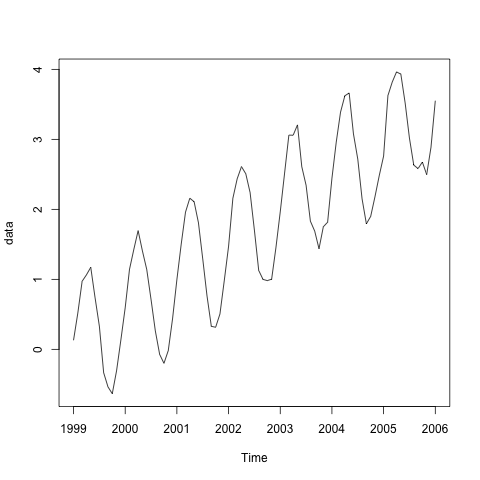

In [53]:
Image("/Users/nipunbatra/Desktop/ts_1.png")

In [54]:
r_ts_decomposed = r_stl(r_ts_data, 12)

In [55]:
r_plot(r_ts_decomposed, "/Users/nipunbatra/Desktop/decomposed.png")

<IntVector - Python:0x114371fc8 / R:0x119cce298>
[       1]

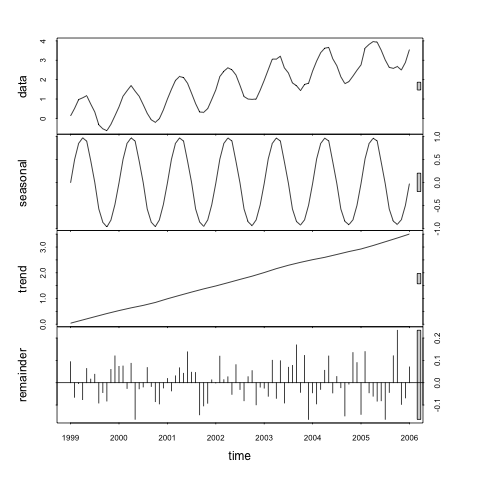

In [56]:
Image("/Users/nipunbatra/Desktop/decomposed.png")

This looks great. Let us now write a small Python class which takes in a Pandas timeseries and uses R's stl for decomposition and returns a dataframe consisting of data and three other timeseries.

In [57]:
class PYSTL(object):
    
    def convert_pd_freqstr(df):
    
        freqstr = df.index.freq.freqstr
        freq_interval = freqstr[-1]
        if len(freqstr)>1:
            freq_number = int(freqstr[:-1])
        else:
            freq_number=1
        if freq_interval is 'Y':
            return 1.0/freq_number
        elif freq_interval is 'M':
            return 12.0/freq_number
        elif freq_interval is 'D':
            return 365.0/freq_number


    def decompose(self, ser, np=12):
        from rpy2 import robjects
        from numpy import asarray
        
        r_stl = robjects.r['stl']
        r_ts = robjects.r['ts']
        start = robjects.IntVector([ser.index[0].year, ser.index[0].month, ser.index[0].day])
        freq = convert_pd_freqstr(ser)
        r_ts_data = r_ts(robjects.FloatVector(asarray(ser)), start=start, frequency=freq)
        r_decomposed = r_stl(r_ts_data, freq)
        res_ts = asarray(r_decomposed[0])
        res_ts = pd.DataFrame({"data":data,
                                    "seasonal" : pd.Series(res_ts[:,0],
                                                           index=data.index),
                                   "trend" : pd.Series(res_ts[:,1],
                                                           index=data.index),
                                   "remainder" : pd.Series(res_ts[:,2],
                                                           index=data.index)})
        
        res_ts = res_ts[['data','seasonal','trend','remainder']]
        self.decomposed = res_ts
        return res_ts
    
    def plot(self, **kwargs):
        ax = self.decomposed.plot(subplots=True, legend=False, **kwargs)
        plt.tight_layout()
        ax[0].set_ylabel("data")
        ax[1].set_ylabel("seasonal")
        ax[2].set_ylabel("trend")
        ax[3].set_ylabel("remainder")
        ax[3].set_xlabel("Time")
        

        

In [58]:
pystl = PYSTL()

In [59]:
pystl.decompose(data).head()

,data,seasonal,trend,remainder
1999-01-31,0.129091,-0.005376,0.040424,0.094043
1999-02-28,0.518482,0.501866,0.082159,-0.065544
1999-03-31,0.972111,0.852298,0.123895,-0.004083
1999-04-30,1.063767,0.974069,0.165630,-0.075932
1999-05-31,1.171507,0.900570,0.207297,0.063640


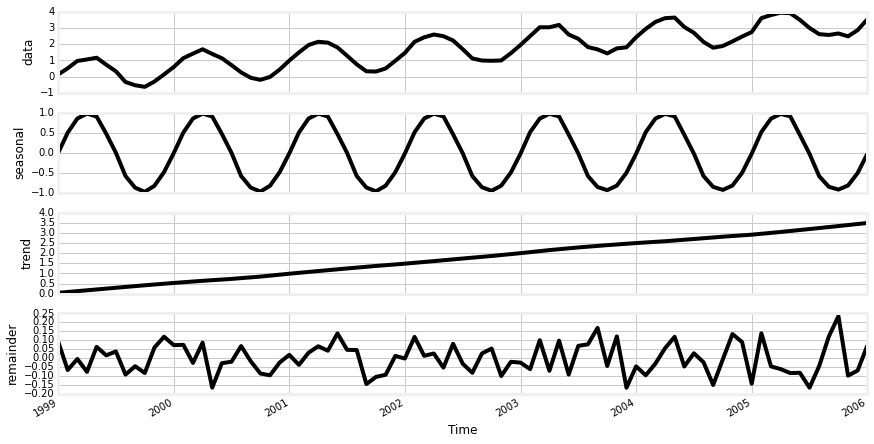

In [60]:
pystl.plot(figsize=(12,6))

So, there you go. RPY2 makes our life easy! With a minimal amount of effort, one can effectively open up the entire set of R libraries to be used in Python.
Please feel free to contribute to the project and provide your feedback.